<div style="text-align:center"> 
    <p style="font-size: 50px; margin-bottom: 0">Open Cluster Characterisation - M67</p>
    <p style="font-size: 20px; font-style: italic">ASTR 511 HW2 - Tom Wagg</p>
    <img src="M67_scienceblogsdotcom.jpeg" height="300px" style="border-radius: 100%">
</div>

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_format = "retina"
plt.style.use("dark_background")

from sklearn.mixture import GaussianMixture
from isochrones.mist import MISTIsochroneGrid
from isochrones.mist.bc import MISTBolometricCorrectionGrid

import astropy.units as u
from astropy.visualization import quantity_support
quantity_support()
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = -1

Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.


# Part 1: Isolate cluster members
## Perform a Cone Search around the target

In [2]:
coord = SkyCoord(ra="08h51m03s", dec=11.49, unit=(u.degree, u.degree), frame='icrs')
radius = 1 * u.deg
j = Gaia.cone_search_async(coord, radius)

INFO: Query finished. [astroquery.utils.tap.core]


In [3]:
r = j.get_results()
r = r.to_pandas().set_index("source_id")

In [4]:
# didn't use this in the end but tracking the interesting columns for me
columns=["dist", "source_id", "ra", "dec", "ra_error", "dec_error",
         "parallax", "parallax_error", "pmra", "pmra_error", "pmdec", "pmdec_error",
         "phot_g_mean_mag", "phot_bp_mean_mag", "phot_rp_mean_mag", "a_g_val"]

In [5]:
r

,solution_id,DESIGNATION,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,dist
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
598889556854572672,1635721458409799680,Gaia DR2 598889556854572672,1176460461,2015.5,132.762456,0.039452,11.495085,0.035029,0.782290,0.056015,13.965704,-2.234006,0.118945,1.268996,0.119216,-0.424627,-0.041809,-0.227167,0.221472,-0.236372,0.605028,-0.785085,-0.172691,0.429099,-0.792799,284,0,283,1,1.416685,312.040192,0.071504,0.670944,31,False,15.272051,1.566975,0.007197,-0.031739,33,11,0.154670,0,35,True,301,13627.542336,4.463750,3052.935791,15.352322,31,6969.172180,10.601081,657.402039,15.743435,32,9698.114186,16.245186,596.983887,14.795201,1.223059,0,0.948234,0.391113,0.557120,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,215.991335,31.712607,131.984014,-5.931574,100001,5364.852539,5282.0,5785.282227,0.3253,0.1829,0.4847,0.1633,0.1040,0.2490,200111,1.106147,0.951217,1.141121,0.913170,0.771704,1.054637,https://gea.esac.esa.int/data-server/datalink/...,0.005091
598889552564701312,1635721458409799680,Gaia DR2 598889552564701312,939420882,2015.5,132.756219,1.221686,11.493655,1.171564,-0.103058,1.686537,-0.061106,-1.034997,3.147085,-4.892142,2.662119,-0.730931,-0.440083,-0.549058,0.605474,0.440029,0.787744,-0.886647,0.573219,-0.264762,-0.810182,251,0,245,6,1.886506,283.004517,0.000000,0.000000,31,False,0.028019,1.267906,0.175035,-0.035836,30,10,3.723985,0,32,False,272,103.505743,0.941255,109.965652,20.650955,18,37.943370,7.723823,4.912512,21.403549,27,131.420743,7.634628,17.213772,19.465260,1.636277,0,1.938290,0.752594,1.185696,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,215.989833,31.706462,131.978491,-5.934610,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,0.007166
598889449480994944,1635721458409799680,Gaia DR2 598889449480994944,299968321,2015.5,132.752334,0.969877,11.486227,0.840157,3.825357,1.225824,3.120640,-14.772357,2.131818,-15.708994,2.144506,-0.506023,-0.326557,-0.289459,0.280931,-0.120730,0.577735,-0.809866,0.027426,0.294512,-0.717973,240,0,238,2,0.621057,245.973740,0.000000,0.000000,31,False,0.030772,1.599588,0.179344,0.000856,29,12,2.563867,0,31,False,260,104.205421,0.786280,132.529739,20.643641,21,82.712523,7.447978,11.105366,20.557461,21,67.757496,8.491827,7.979142,20.184526,1.443975,0,0.372934,-0.086180,0.459114,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,215.995865,31.699

### Plot out the proper motions

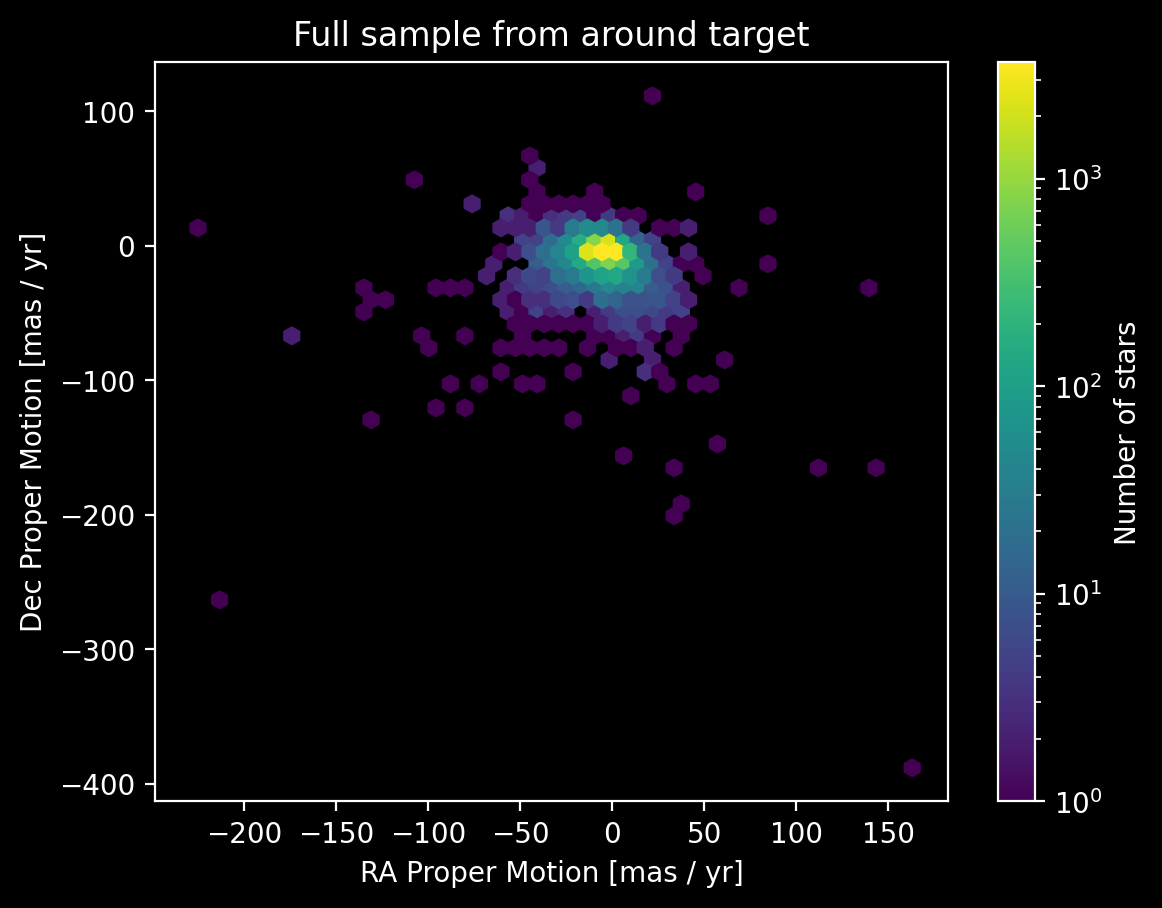

In [6]:
hb = plt.hexbin(r["pmra"], r["pmdec"], gridsize=50, bins="log")
plt.colorbar(hb, label="Number of stars")
plt.xlabel("RA Proper Motion [mas / yr]")
plt.ylabel("Dec Proper Motion [mas / yr]")
plt.title("Full sample from around target")
plt.show()

## Simple quality cuts
Now we can apply some simple quality cuts. For this I have just applied
- Ensure there are no NaNs in the proper motion (basically avoid bad measurements I think)
- Fix a good parallax/parallax error radius to keep only the ones with a good measurement
- Restrict the proper motion to reasonably slow velocities to get rid of outliers

In [7]:
motion_not_nan = (~np.isnan(r["pmra"])) & (~np.isnan(r["pmdec"]))
good_parallax = (r["parallax"] / r["parallax_error"]) > 5
not_too_fast = (np.abs(r["pmra"]) < 30) & (np.abs(r["pmdec"]) < 30)

quality_cut = motion_not_nan & good_parallax & not_too_fast
len(r), len(r[quality_cut])

(19580, 5272)

This reduces the data to about a quarter of its original size

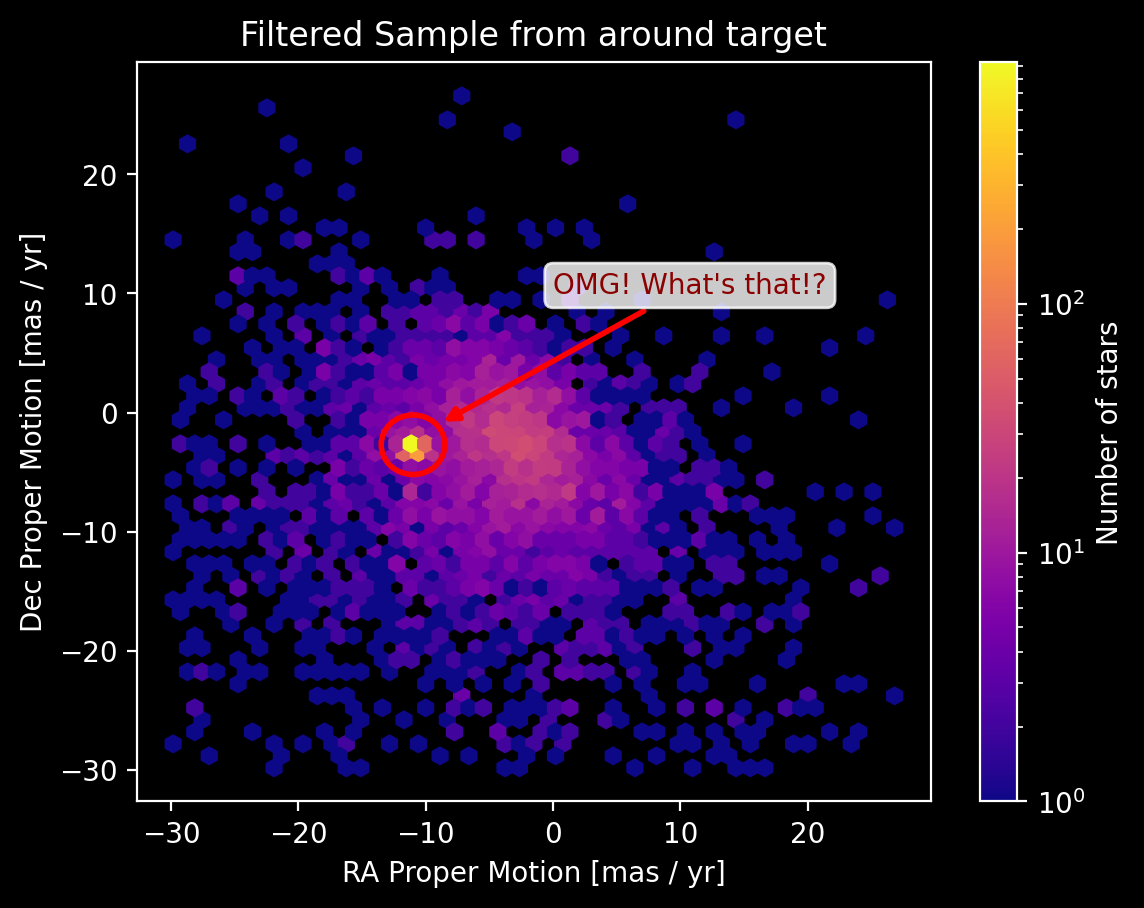

In [8]:
hb = plt.hexbin(r["pmra"][quality_cut], r["pmdec"][quality_cut], gridsize=50, bins="log", cmap="plasma")
plt.colorbar(hb, label="Number of stars")
plt.xlabel("RA Proper Motion [mas / yr]")
plt.ylabel("Dec Proper Motion [mas / yr]")
plt.title("Filtered Sample from around target")
plt.gca().add_artist(plt.Circle((-11, -2.7), 2.5, facecolor="none", edgecolor="red", lw=2))
plt.annotate("OMG! What's that!?", xy=(-9, -1), xytext=(0, 10), color="darkred",
             bbox=dict(boxstyle="round", color="white", alpha=0.8),
             arrowprops=dict(arrowstyle="-|>", color="red", lw=2))
plt.show()

Look! We can see a cluster!!! So cool :D Now let's go identify which stars belong to it properly.

## Apply GMM to isolate cluster stars
Shoutout to Andy C and Stephen for teaching me how to do this in their class last year

The general plan here:
1. Fit a series of GMMs with a range of different `n_components`
2. Pick the one with the lowest BIC
3. For chosen model, predict the probability that each star belongs to the cluster (I'm assuming the cluster is the most compact of the different Gaussians)
4. ...Profit?

In [9]:
# I stole this from an example in the scikit-learn docs which I have now lost
# it plots the ellipses representing the gaussians that are fit roughly
def make_ellipses(gmm, ax):
    for n in range(gmm.n_components):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=f"C{n + 1}"
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.25)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")

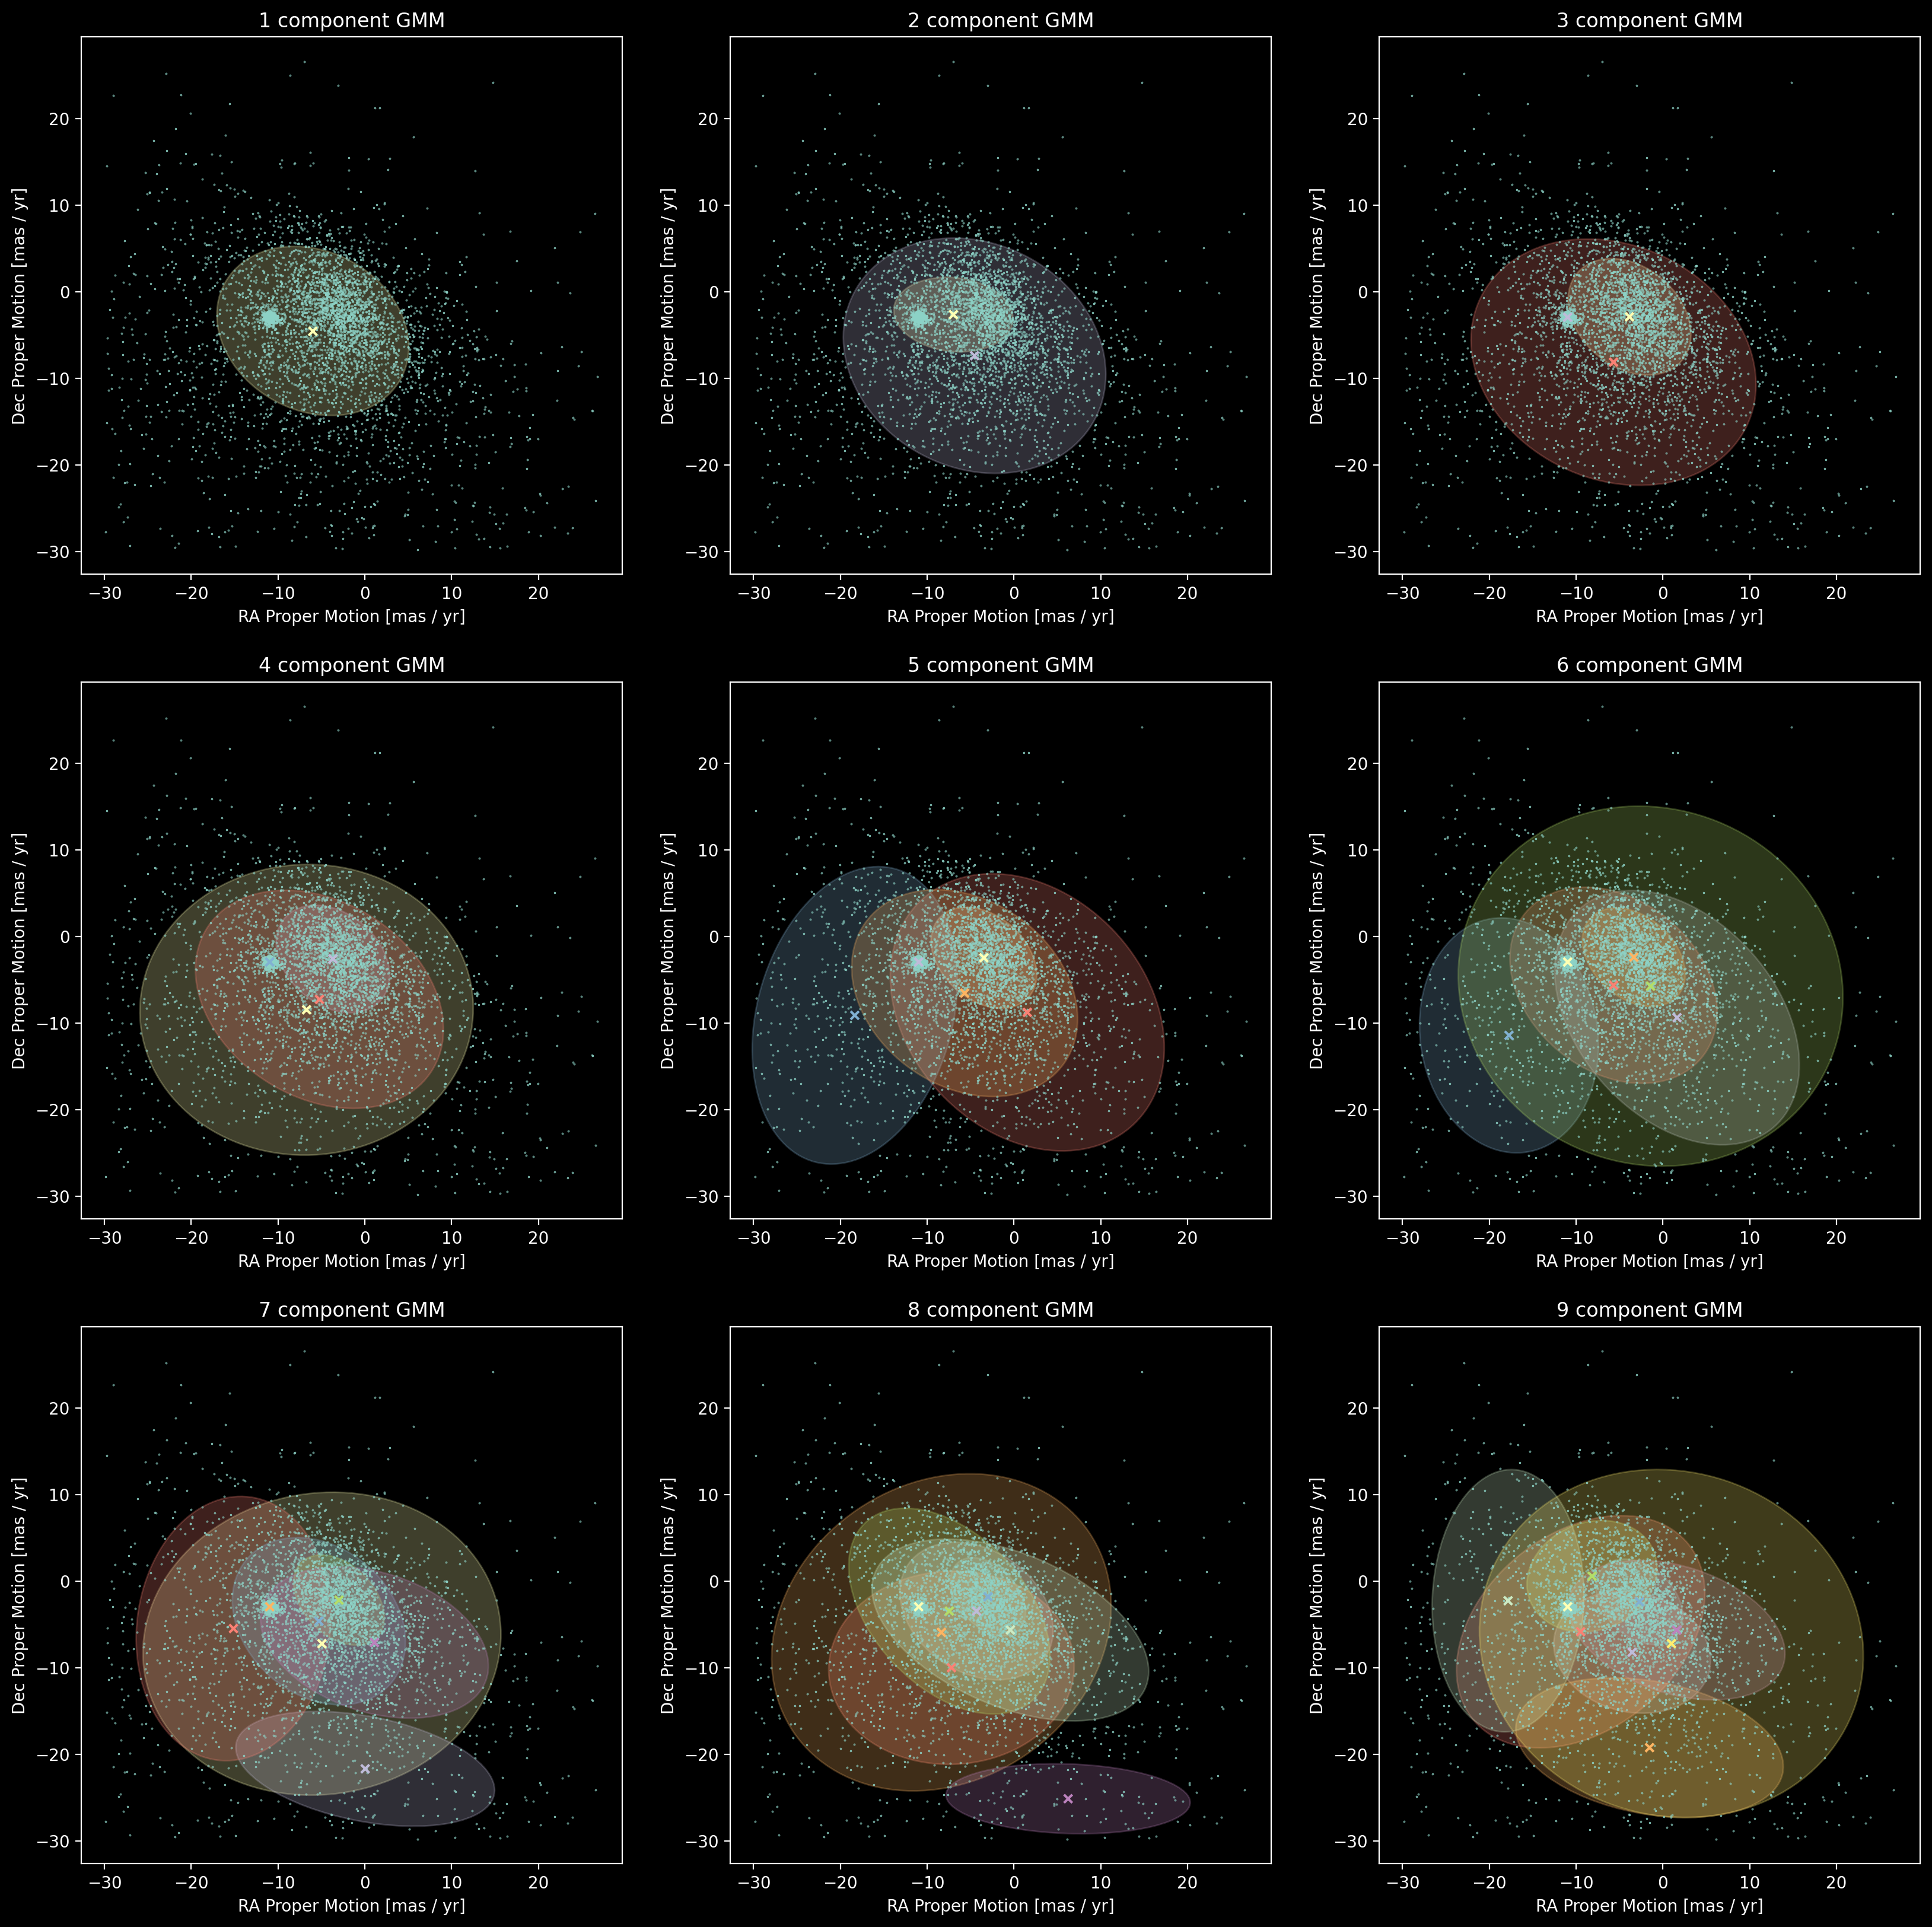

In [10]:
n_components_list = range(1, 10)

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
flat_axes = axes.ravel()

bics = [None for i in n_components_list]
mixes = [None for i in n_components_list]
X = r[["pmra", "pmdec", "parallax", "ra", "dec"]][quality_cut].values
for i, n_components in enumerate(n_components_list):
    mixes[i] = GaussianMixture(n_components=n_components)
    mixes[i].fit(X)

    bics[i] = mixes[i].bic(X)

    make_ellipses(mixes[i], flat_axes[i])

    flat_axes[i].scatter(*X.T[:2, :], s=0.1)#, c=mix.predict(X))
    flat_axes[i].scatter(*mixes[i].means_.T[:2, :], s=25, marker="x",
                c=[f"C{j + 1}" for j in range(n_components)])
    flat_axes[i].set_title(f"{n_components} component GMM")


for ax in flat_axes:
    ax.set_xlabel("RA Proper Motion [mas / yr]")
    ax.set_ylabel("Dec Proper Motion [mas / yr]")

plt.show()

By eye we can see the cluster pop out as soon as we have a couple of components - but which model is best? BIC time!

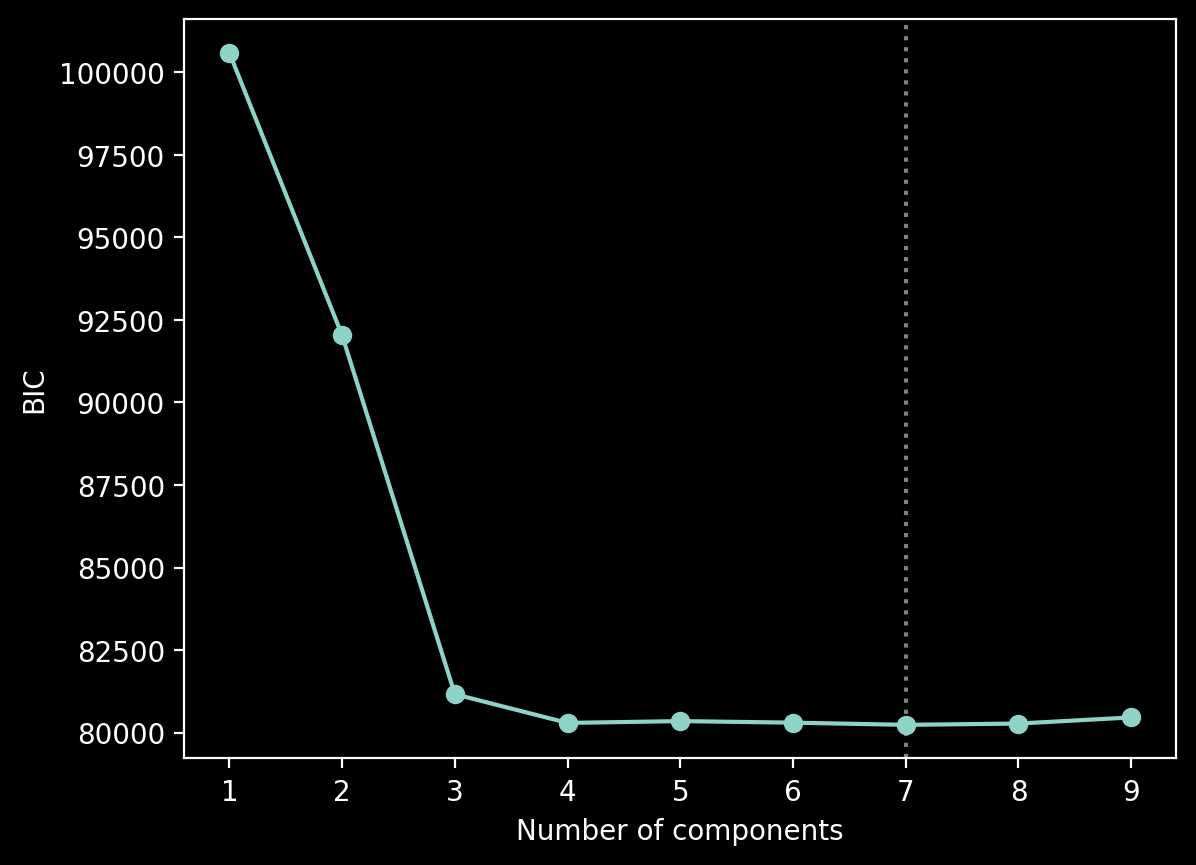

In [11]:
plt.plot(n_components_list, bics, marker="o")
plt.xlabel("Number of components")
plt.ylabel("BIC")
plt.axvline(n_components_list[np.argmin(bics)], color="grey", linestyle="dotted", zorder=-1)
plt.show()

So now we've found a best fitting mixture model, no need for more components. Great, now let's identify which of the components is our cluster (assuming that it is the smallest one)

In [12]:
best_mix = mixes[np.argmin(bics)]

# the eigenvalues tell you the length of the primary and secondary axis of the ellipse in 2D
# imagine extending it to more dimensions gives you a rough approximation of the volume
ellipse_areas = [np.product(np.linalg.eigh(best_mix.covariances_[i])[0]) for i in range(best_mix.n_components)]
cluster_comp = np.argmin(ellipse_areas)

In [13]:
# get a probability that each star is part of the cluster
probs = best_mix.predict_proba(X)[:, cluster_comp]

Conservatively just say a start needs a 10% chance of being in the cluster to make it through our cut. Let's see how that looks

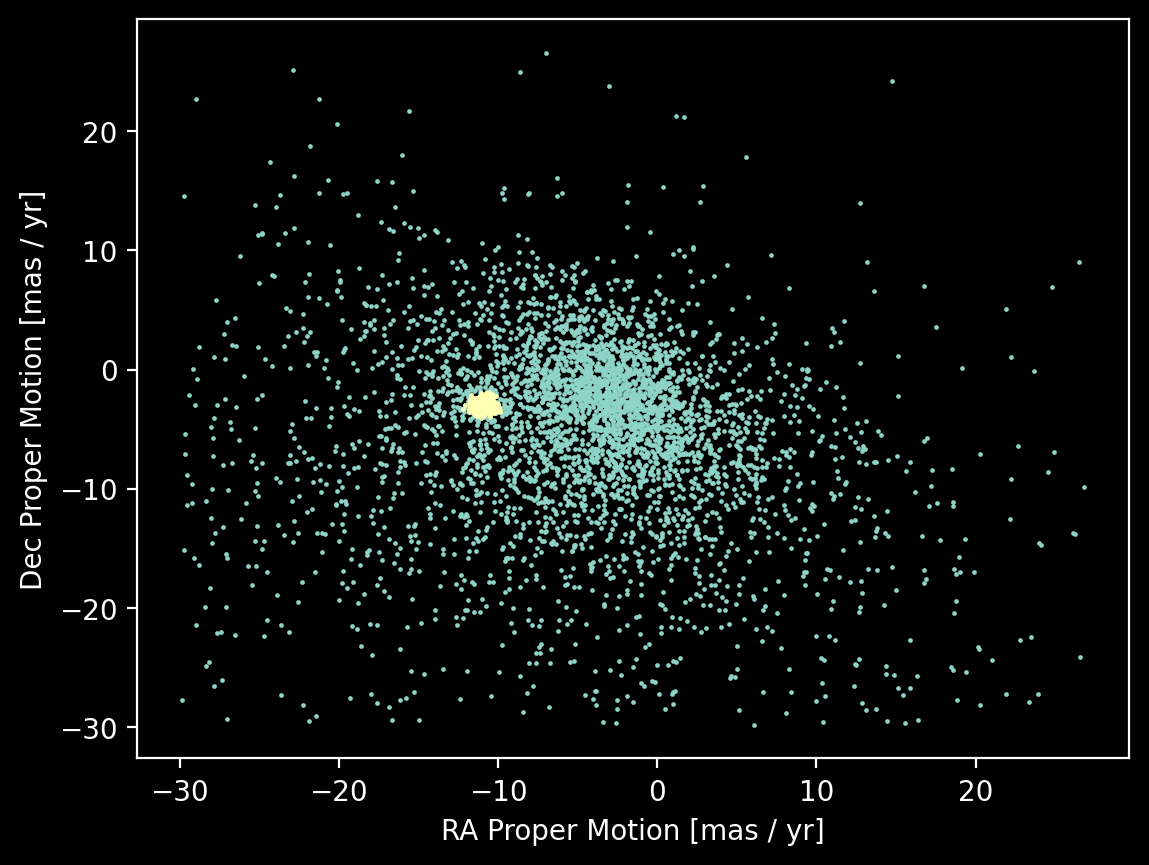

In [14]:
plt.scatter(*X.T[:2, :], s=0.5)
plt.scatter(*X[probs > 0.1].T[:2, :], s=0.5)
plt.xlabel("RA Proper Motion [mas / yr]")
plt.ylabel("Dec Proper Motion [mas / yr]")
plt.show()

Looking good! I see a cluster :D

# Part 2: Characterisation
Now let's start to explore what sort of a cluster this is!

In [15]:
cluster = r[quality_cut][probs > 0.1]
field = r[quality_cut][probs <= 0.1]

## Initial Color-Magnitude Diagrams
As a first step, let's plot the CMD before and after the cut using a quick little function

In [16]:
# plot color-magnitude diagram(s) for a table of gaia sources
def plot_cmd(*gaia_table, colour_col=None, **kwargs):
    fig, ax = plt.subplots(figsize=(5, 9))

    for table in gaia_table:
        if "phot_g_mean_mag" in table.columns.values:
            bp, rp, G = "phot_bp_mean_mag", "phot_rp_mean_mag", "phot_g_mean_mag"
        else:
            bp, rp, G = "BP", "RP", "G"

        if colour_col is None:
            ax.scatter(table[bp] - table[rp], table[G], s=0.25, **kwargs)
        else:
            ax.scatter(table[bp] - table[rp], table[G], s=0.25, c=table[colour_col], **kwargs)

    ax.invert_yaxis()

    # log_age = 9.6
    # feh = 0.25
    # ax.plot(grid.df.loc[log_age, feh]["BP"] - grid.df.loc[log_age, feh]["RP"], grid.df.loc[log_age, feh]["G"],
    #         color="C1", zorder=-1);

    ax.set_xlabel(r"Colour, $G_{\rm BP} - G_{\rm RP}$")
    ax.set_ylabel(r"Magnitude, $G$")

    plt.show()

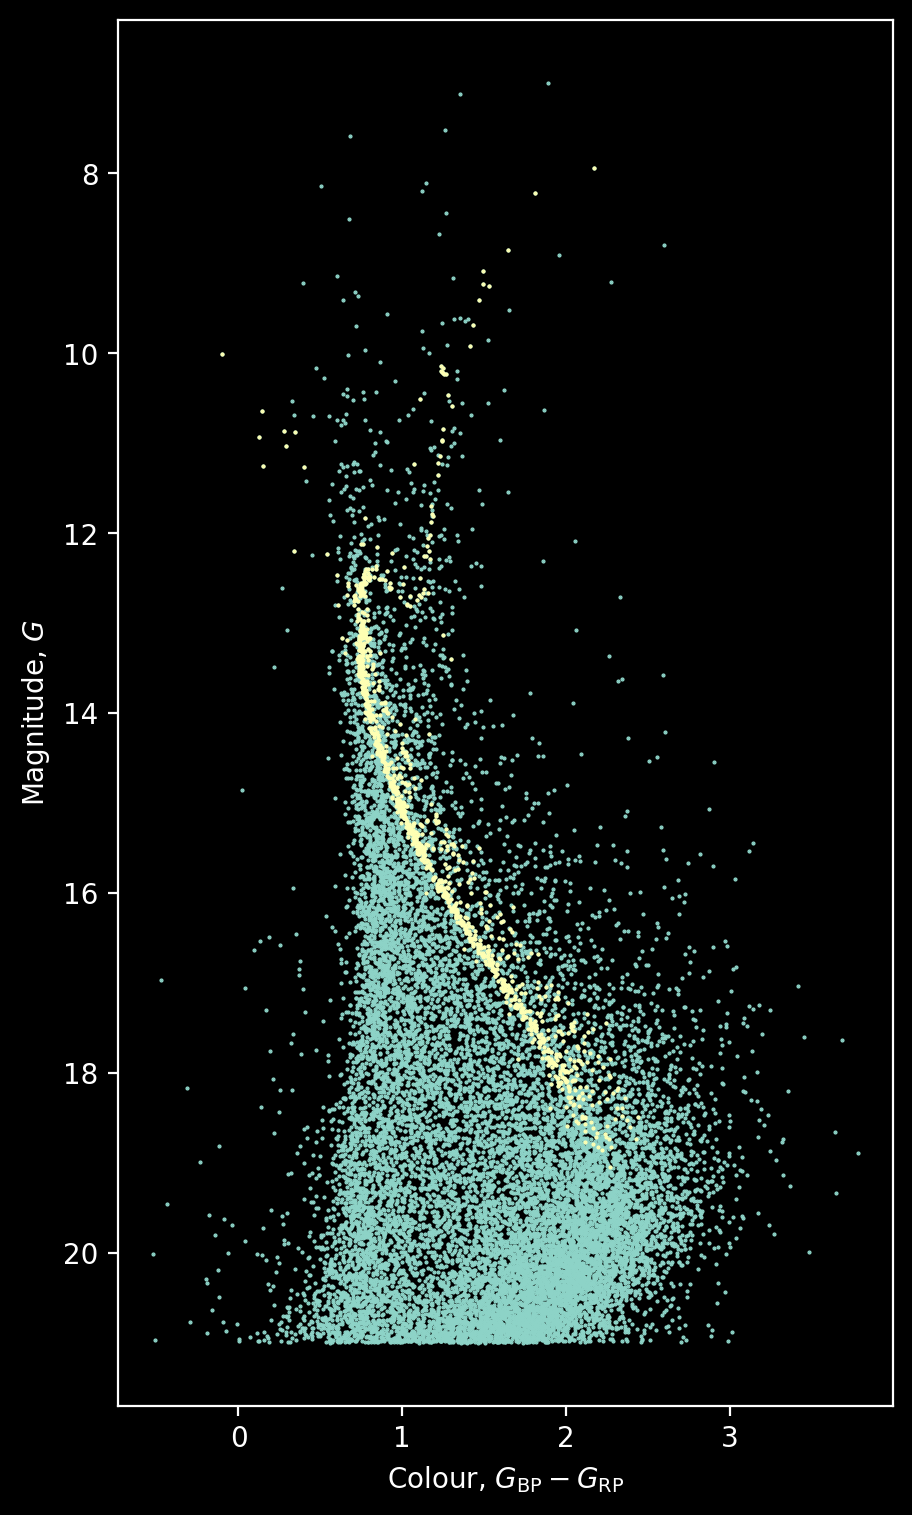

In [17]:
plot_cmd(r, cluster)

Look how far we've come! Much much cleaner. Here's the cluster CMD alone, coloured by the parallax

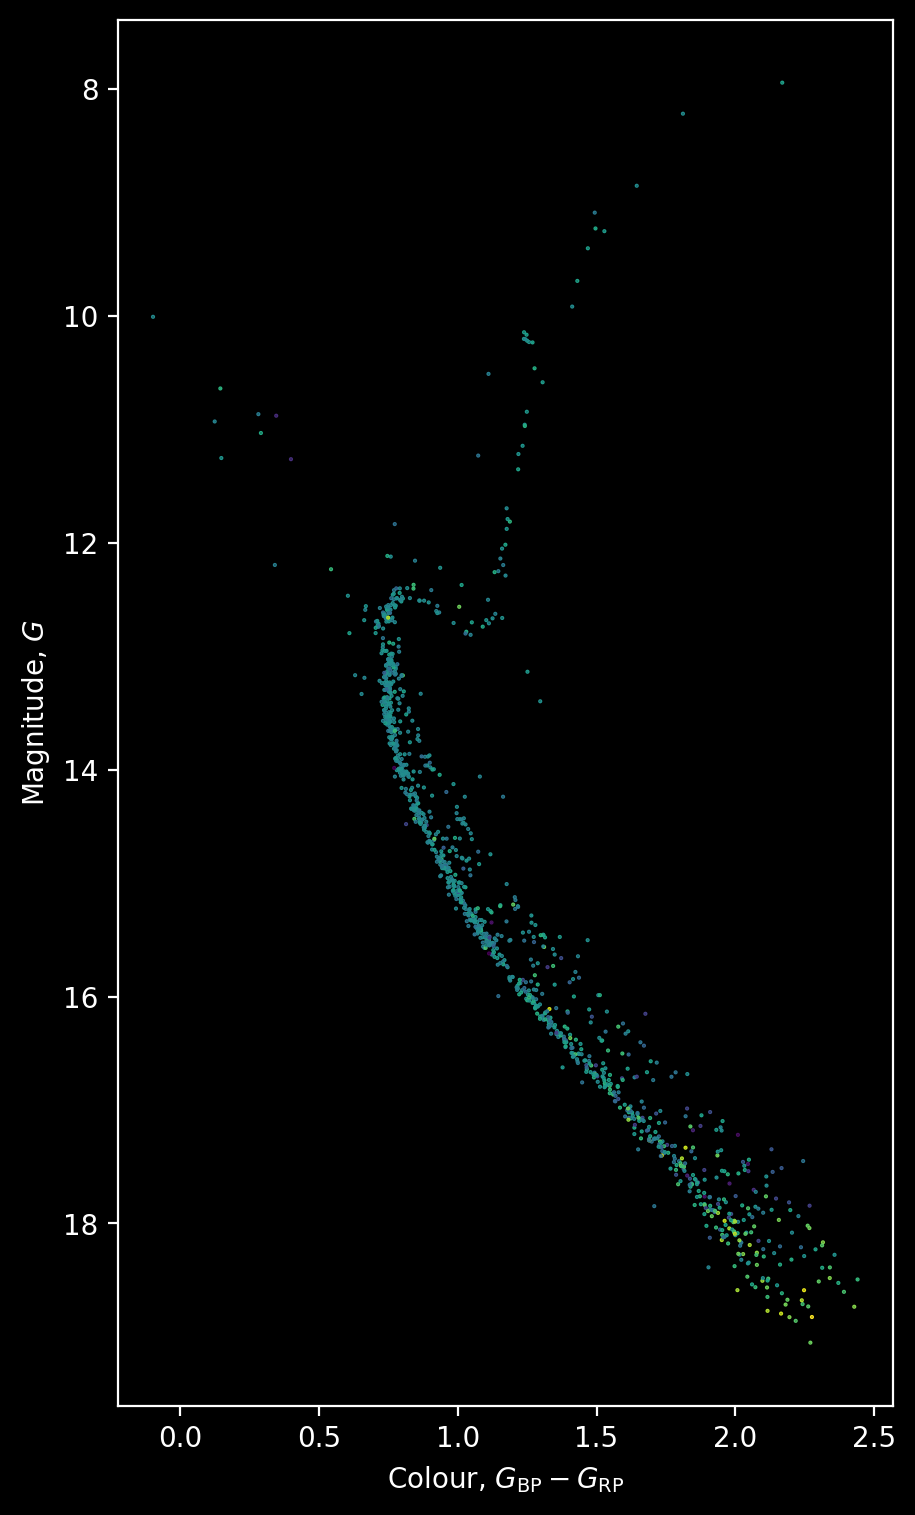

In [18]:
plot_cmd(cluster, colour_col="parallax")

## How far away is this cluster?
Let's plot up the distances for each star

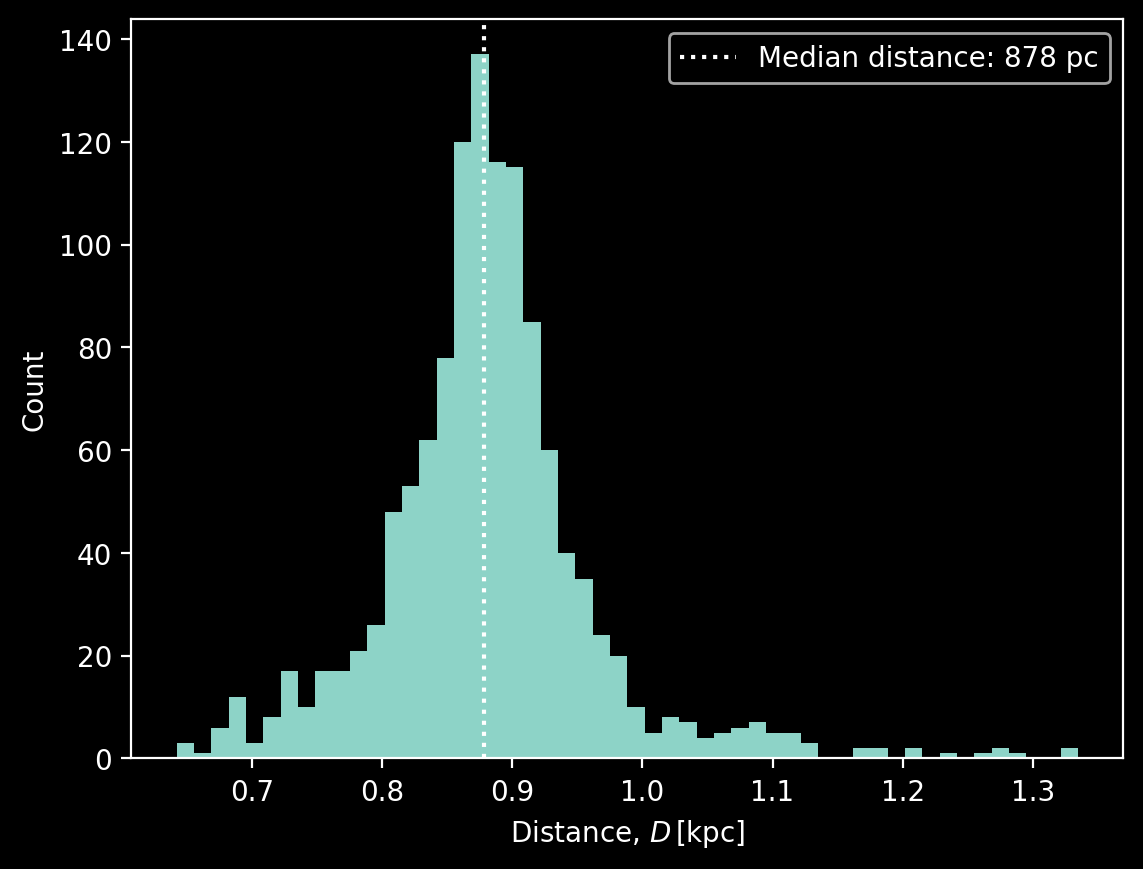

In [19]:
distances = 1 / cluster["parallax"].values * u.kpc
avg_distance = np.median(distances)

plt.hist(distances, bins="fd")
plt.axvline(avg_distance, linestyle="dotted", label=f"Median distance: {avg_distance.to(u.pc):1.0f}")
plt.xlabel(r"Distance, $D \, [\rm kpc]$")
plt.ylabel("Count")
plt.legend()
plt.show()

We've got a couple of outlying larger distances here so a median is probably better than a mean to ensure they don't have a strong effect.

The cluster is approximately ~880pc away according to our selection - this will be useful for magnitudes in a moment

## Prep MIST Isochrones
MIST isochrones using the `isochrones` package don't include the Gaia magnitudes by default. But we can convert the absolute bolometric magnitude to an apparent magnitude in each filter using bolometric correction grids and the average cluster distance.

In [20]:
grid = MISTIsochroneGrid()
bc_grid = MISTBolometricCorrectionGrid(['G', 'BP', 'RP'])

In [21]:
# copied this function from a different project
def get_apparent_mag(M_abs, distance):
    """Convert absolute magnitude to apparent magnitude
    Parameters
    ----------
    M_abs : :class:`~numpy.ndarray`
        Absolute magnitude
    distance : :class:`~astropy.units.Quantity` [length]
        Distance
    Returns
    -------
    m_app : :class:`~numpy.ndarray`
        Apparent magnitude
    """
    finite_distance = np.isfinite(distance)
    m_app = np.repeat(np.inf, len(distance))
    m_app[finite_distance] = M_abs[finite_distance] + 5 * np.log10(distance[finite_distance] / (10 * u.pc))
    return m_app

# convert the absolute magnitude to an apparent magnitude
grid.df["m_app"] = get_apparent_mag(grid.df["Mbol"].values,
                                    np.ones_like(grid.df["Mbol"].values) * avg_distance)

In [22]:
# grab the parameters from the isochrone grid and assume no extinction (see below)
bc_params = grid.df[["Teff", "logg", "feh"]].values
bc_params_plus_extinction = np.append(bc_params, np.zeros((len(bc_params), 1)), axis=1)

### Side note: Extinction
Is it reasonable for me to ignore extinction in that last cell? Let's check!

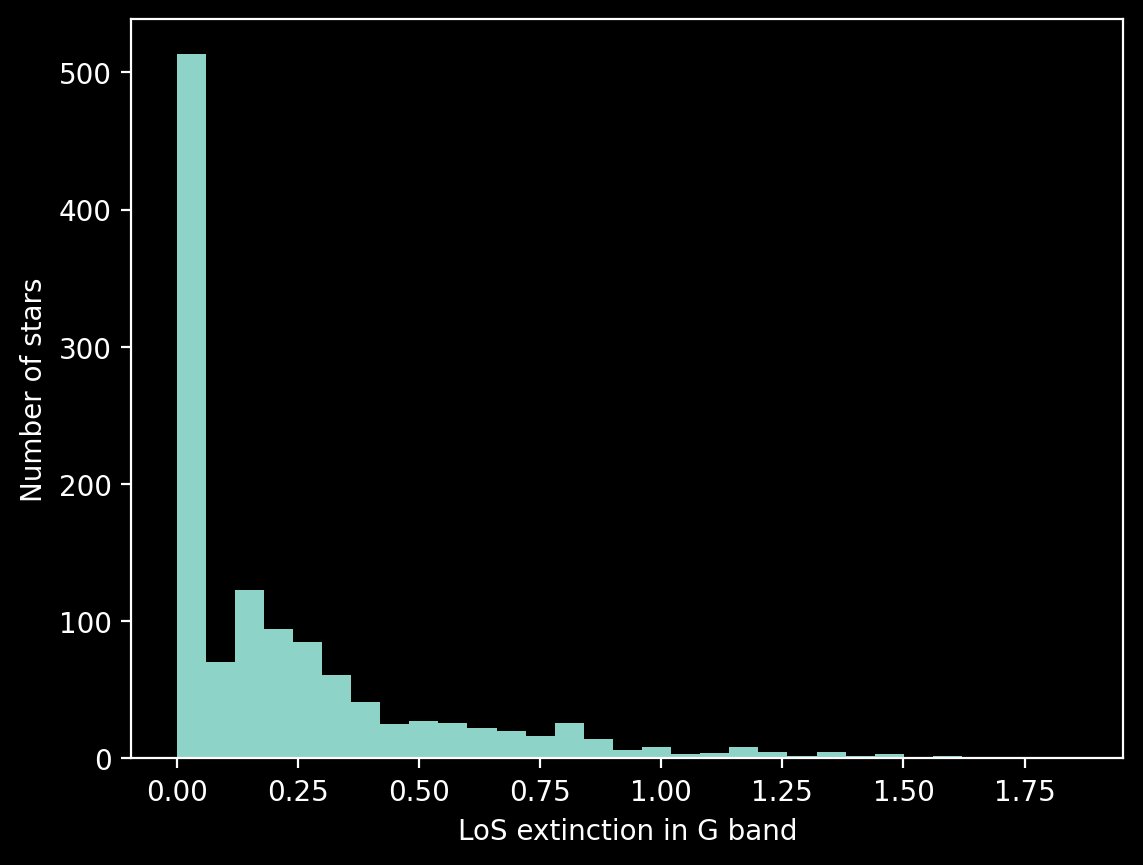

In [23]:
plt.hist(np.nan_to_num(cluster["a_g_val"], 0.0), bins="fd")
plt.xlabel("LoS extinction in G band")
plt.ylabel("Number of stars")
plt.show()

Eh okay well they're not all 0 but the values are pretty low, so this shouldn't have too strong an effect. Let's keep it in mind though

### Apply bolometric corrections
Use `isochrone`'s bolometric correction grid to get the magnitude in each relevant Gaia filter for all of the isochrones.

In [24]:
filters = ["G", "BP", "RP"]
filter_mags = grid.df["m_app"].values[:, None] - bc_grid.interp(bc_params_plus_extinction.T, filters)

for i, filt in enumerate(filters):
    grid.df[filt] = filter_mags.T[i]

### Plot example isochrone
Okay let's look at an example. Hmm what to use for the parameters? Well let's just use some completely random, definitely not intentionally chosen parameters...

In [25]:
import scipy

In [26]:
cluster["phot_g_mean_mag"].values

array([17.073927, 15.741884, 15.874586, ..., 16.773859, 15.44492 ,
       15.487358], dtype=float32)

In [37]:
len(grid.df.loc[log_age, feh])

1490

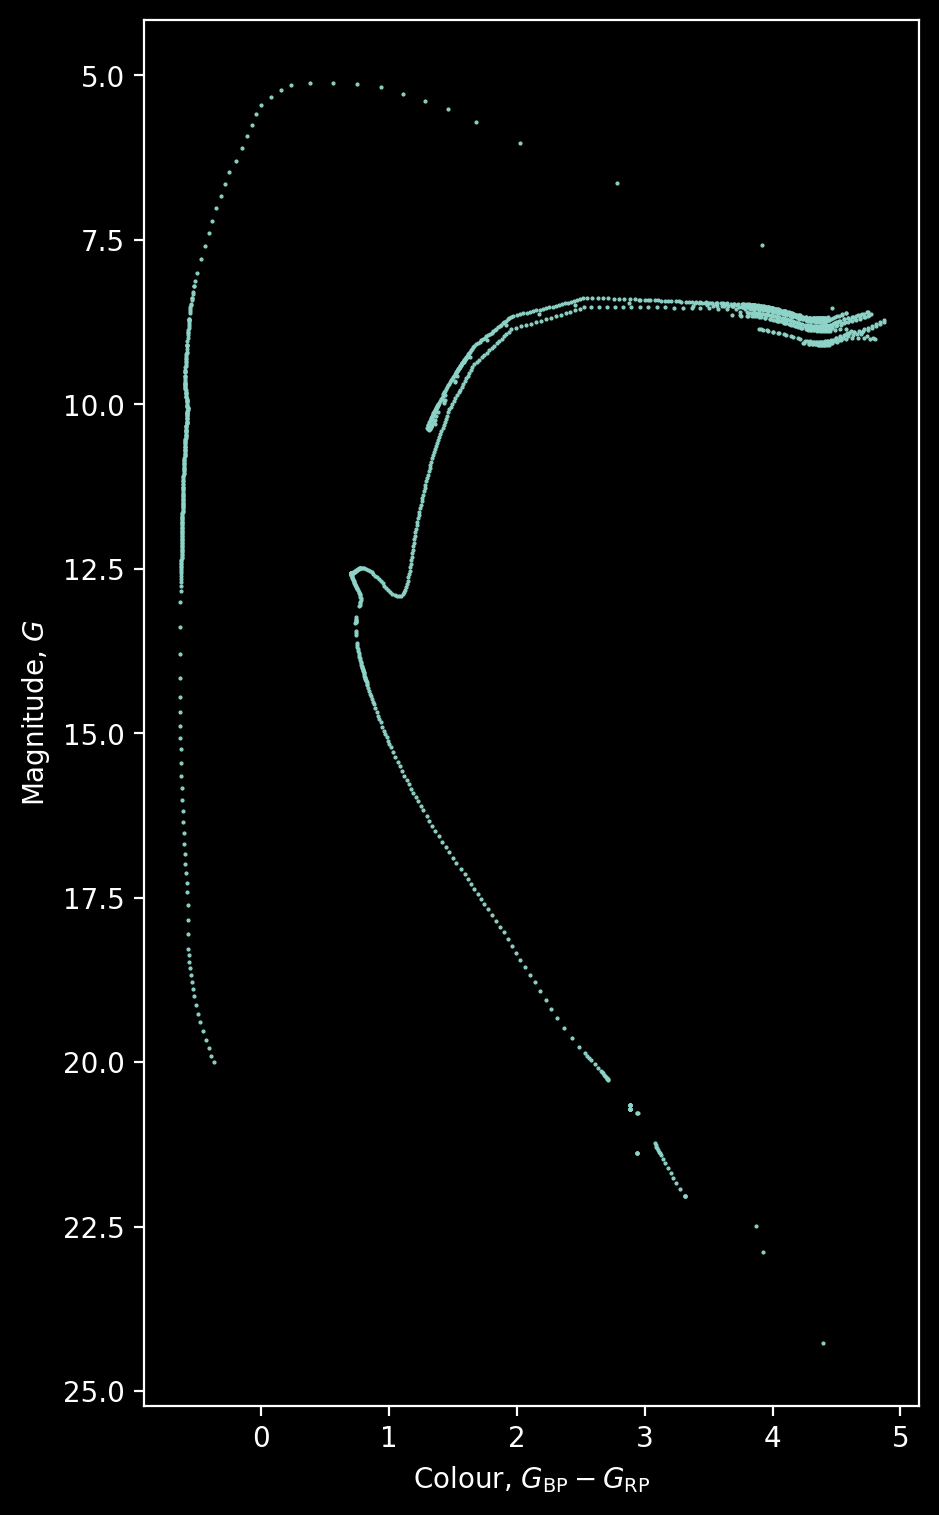

In [36]:
log_age = 9.6
feh = 0.25
plot_cmd(grid.df.loc[log_age, feh])

Well doesn't that look rather familiar ;P

## Fit isochrones

In [29]:
from scipy.stats import uniform, norm
from isochrones import get_ichrone
from isochrones.priors import GaussianPrior, SalpeterPrior, DistancePrior, FlatPrior
from isochrones.populations import StarFormationHistory, StarPopulation

# Initialize interpolator
mist = get_ichrone('mist')

# Initialize distributions

# Ingredients required to generate primary & secondary masses
imf = SalpeterPrior(bounds=(1, 100))  # minimum 1 Msun
fB = 0.5
gamma = 0.3

# SFH distribution takes a scipy stats distribution, of age in Gyr
sfh = StarFormationHistory(dist=uniform(5, 5.01))

# The following are all isochrones.priors.Prior objects,
# or anything with a .sample(N) method
feh = GaussianPrior(0.05, 0.005)
distance = FlatPrior(bounds=[avg_distance.to(u.kpc).value, avg_distance.to(u.kpc).value + 0.01])
AV = FlatPrior(bounds=[0, 1])

pop = StarPopulation(mist, imf=imf, fB=fB, gamma=gamma, sfh=sfh, feh=feh, distance=distance, AV=AV)

In [30]:
genpop = pop.generate(1000)

/home/tomwagg/anaconda3/envs/astr511/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/home/tomwagg/anaconda3/envs/astr511/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/home/tomwagg/anaconda3/envs/astr511/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

In [31]:
genpop

,Teff_0,logg_0,initial_mass_0,Mbol_0,eep_0,radius_0,logTeff_0,nu_max_0,phase_0,logL_0,mass_0,delta_nu_0,density_0,feh_0,interpolated_0,star_age_0,age_0,dt_deep_0,J_mag_0,H_mag_0,K_mag_0,G_mag_0,BP_mag_0,RP_mag_0,W1_mag_0,W2_mag_0,W3_mag_0,TESS_mag_0,Kepler_mag_0,distance_0,AV_0,initial_feh_0,requested_age_0,A_J_0,A_H_0,A_K_0,A_G_0,A_BP_0,A_RP_0,A_W1_0,A_W2_0,A_W3_0,A_TESS_0,A_Kepler_0,Teff_1,logg_1,initial_mass_1,Mbol_1,eep_1,radius_1,logTeff_1,nu_max_1,phase_1,logL_1,mass_1,delta_nu_1,density_1,feh_1,interpolated_1,star_age_1,age_1,dt_deep_1,J_mag_1,H_mag_1,K_mag_1,G_mag_1,BP_mag_1,RP_mag_1,W1_mag_1,W2_mag_1,W3_mag_1,TESS_mag_1,Kepler_mag_1,distance_1,AV_1,initial_feh_1,requested_age_1,A_J_1,A_H_1,A_K_1,A_G_1,A_BP_1,A_RP_1,A_W1_1,A_W2_1,A_W3_1,A_TESS_1,A_Kepler_1,J_mag,A_J,H_mag,A_H,K_mag,A_K,G_mag,A_G,BP_mag,A_BP,RP_mag,A_RP,W1_mag,A_W1,W2_mag,A_W2,W3_mag,A_W3,TESS_mag,A_TESS,Kepler_mag,A_Kepler
0,6078.043596,4.070629,1.157265,3.439750,440.222470,1.642674,3.783674,1299.581964,0.0,0.520100,1.156770,73.804596,0.369670,-0.025100,0.0,5.442630e+09,9.734393,0.002087,-2.762149,-3.060450,-3.100571,-1.784578,-1.483263,-2.251518,-3.119092,-3.114067,-3.136830,-2.258254,-1.869897,0.882851,0.155391,0.046737,9.730279,0.045097,0.028456,0.018335,0.137565,0.169308,0.101535,0.009250,0.005505,0.001500,0.100049,0.135870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.882851,0.155391,0.046737,9.730279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.762149,0.045097,-3.060450,0.028456,-3.100571,0.018335,-1.784578,0.137565,-1.483263,0.169308,-2.251518,0.101535,-3.119092,0.009250,-3.114067,0.005505,-3.136830,0.001500,-2.258254,0.100049,-1.869897,0.135870
1,5950.560203,4.288191,1.053897,4.177198,406.371540,1.220061,3.774466,2164.981634,0.0,0.225121,1.053596,108.924905,0.819387,-0.010851,0.0,5.963276e+09,9.774010,0.003796,-1.916858,-2.290661,-2.366550,-0.601549,-0.172470,-1.197180,-2.415447,-2.417650,-2.458463,-1.210556,-0.690286,0.884794,0.666098,0.045554,9.770178,0.193148,0.121930,0.078585,0.575398,0.716360,0.432062,0.039642,0.023600,0.006431,0.424041,0.573046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.884794,0.666098,0.045554,9.770178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.916858,0.193148,-2.290661,0.121930,-2.366550,0.078585,-0.601549,0.575398,-0.172470,0.716360,-1.197180,0.432062,-2.415447,0.039642,-2.417650,0.023600,-2.458463,0.006431,-1.210556,0.424041,-0.690286,0.573046
2,6086.713288,4.159907,1.139973,3.673035,426.811908,1.470974,3.784292,1594.255150,0.0,0.426786,1.139550,85.907636,0.506454,-0.051737,0.0,5.259126e+09,9.719777,0.003349,-2.541847,-2.831094,-2.864706,-1.619155,-1.337586,-2.064541,-2.877838,-2.871308,-2.891244,-2.070356,-1.703219,0.886185,0.066391,0.052203,9.716827,0.019270,0.012158,0.007834,0.058968,0.072485,0.043422,0.003952,0.002352,0.000641,0.042809,0.058171,4384.723987,4.637024,0.690399,6.836270,319.820559,0.660897,3.641706,5629.645038,0.0,-0.838508,0.690370,217.636307,3.376165,0.066407,0.0,5.385625e+09,9.728448,0.014959,0.089656,-0.591882,-0.699721,1.848939,2.508711,1.081074,-0.734457,-0.669312,-0.775012,1.062800,1.754316,0.886185,0.066391,0.052203,9.716827,0.019169,0.012114,0.007832,0.052613,0.067484,0.042244,0.003946,0.002360,0.000640,0.040987,0.053951,-2.634011,0.019262,-2.961048,0.012153,-3.003292,0.007834,-1.662780,0.058718,-1.368560,0.072345,-2.122854,0.043361,-3.019035,0.003951,-3.005524,0.002353,-3.035789,0.000641,-2.129324,0.042713,-1.747262,0.058004
3,4970.003493,3.732726,1.066598,3.557534,472.943077,2.325892,3.696307,658.953211,2.0,0.472986,1.065883,42.238159,0.119531,0.075970,0.0,8.839598e+09,9.944541,0.001169,-3.033680,-3.542886,-3.619841,-1.608533,-1.118870,-2.249186,-3.652867,-3.596407,-3.681190,-2.261020,-1.708617,0.879438,0.109906,0.049951,9.928257,0.031784,0.020088,0.012969,0.091386,0.114733,0.070874,0.006541,0.003904,0.001061,0.069267,0.092398,NaN,NaN,NaN,N

In [32]:
genpop["G_mag"]

0     -1.784578
1     -0.601549
2     -1.662780
3     -1.608533
4     -1.152222
         ...   
995   -0.851860
996   -1.001785
997   -0.542533
998   -0.784439
999   -1.057178
Name: G_mag, Length: 1000, dtype: float64

In [33]:
grid.df.index.to_frame()["log10_isochrone_age_yr"].unique()

array([ 5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,  5.4 ,
        5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,  5.85,
        5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,  6.3 ,
        6.35,  6.4 ,  6.45,  6.5 ,  6.55,  6.6 ,  6.65,  6.7 ,  6.75,
        6.8 ,  6.85,  6.9 ,  6.95,  7.  ,  7.05,  7.1 ,  7.15,  7.2 ,
        7.25,  7.3 ,  7.35,  7.4 ,  7.45,  7.5 ,  7.55,  7.6 ,  7.65,
        7.7 ,  7.75,  7.8 ,  7.85,  7.9 ,  7.95,  8.  ,  8.05,  8.1 ,
        8.15,  8.2 ,  8.25,  8.3 ,  8.35,  8.4 ,  8.45,  8.5 ,  8.55,
        8.6 ,  8.65,  8.7 ,  8.75,  8.8 ,  8.85,  8.9 ,  8.95,  9.  ,
        9.05,  9.1 ,  9.15,  9.2 ,  9.25,  9.3 ,  9.35,  9.4 ,  9.45,
        9.5 ,  9.55,  9.6 ,  9.65,  9.7 ,  9.75,  9.8 ,  9.85,  9.9 ,
        9.95, 10.  , 10.05, 10.1 , 10.15, 10.2 , 10.25, 10.3 ])